In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from preprocess_data import preprocess_dataset, __normalize_dataframe

# Class distribution

Make windows of size 30sec like in original paper. Let them slide 10sec

In [4]:
dfs = preprocess_dataset("condensed", 3000, 1000)

Finished p1_d1. Took 0 minutes, 22 seconds
Finished p1_d2. Took 0 minutes, 33 seconds
Finished p2_d1. Took 0 minutes, 36 seconds
Finished p2_d2. Took 0 minutes, 36 seconds
Finished p3_d1. Took 0 minutes, 46 seconds
Finished p3_d2. Took 0 minutes, 20 seconds
Finished p4_d1. Took 0 minutes, 26 seconds
Finished p4_d2. Took 0 minutes, 26 seconds
Finished p5_d1. Took 0 minutes, 17 seconds
Finished p5_d2. Took 0 minutes, 15 seconds
Finished p6_d1. Took 0 minutes, 19 seconds
Finished p6_d2. Took 0 minutes, 18 seconds
Finished p7_d1. Took 0 minutes, 16 seconds
Finished p7_d2. Took 0 minutes, 16 seconds
Finished p8_d1. Took 0 minutes, 21 seconds
Finished p8_d2. Took 0 minutes, 19 seconds
Finished p9_d1. Took 0 minutes, 29 seconds
Finished p9_d2. Took 0 minutes, 14 seconds
Finished p10_d1. Took 0 minutes, 18 seconds
Finished p10_d2. Took 0 minutes, 31 seconds


In [38]:
dfs.keys()

dict_keys(['p1_d1', 'p1_d2', 'p2_d1', 'p2_d2', 'p3_d1', 'p3_d2', 'p4_d1', 'p4_d2', 'p5_d1', 'p5_d2', 'p6_d1', 'p6_d2', 'p7_d1', 'p7_d2', 'p8_d1', 'p8_d2', 'p9_d1', 'p9_d2', 'p10_d1', 'p10_d2'])

In [25]:
def get_class_dist(df):
    cldtr = pd.DataFrame(columns=["person", "Not Reading", "English", "Japanese horizontal", "Japanese vertical"])

    for person in range(1,11,1):
        d = np.array([0,0,0,0])
        for day in range(1,3,1):
            key = "p{}_d{}".format(person,day)
            d  += (df[key].value_counts(subset="label", sort = False).transpose().to_numpy())
        df_ = pd.DataFrame({"person" : "person {}".format(person),  "Not Reading" : [d[0]], "English" : [d[1]], "Japanese horizontal" : [d[2]], "Japanese vertical": [d[3]] })
        cldtr = pd.concat([cldtr, df_], axis = 0)

    total = cldtr.sum().transpose().to_numpy()[1:]
    df_ = pd.DataFrame({"person" : "Sum",  "Not Reading" : [total[0]], "English" : [total[1]], "Japanese horizontal" : [total[2]], "Japanese vertical": [total[3]] })
    cldtr = pd.concat([cldtr, df_], axis = 0, ignore_index=True)  
    return cldtr

print(get_class_dist(dfs))

       person Not Reading English Japanese horizontal Japanese vertical
0    person 1        5641     926                1014               987
1    person 2        5673    1022                 871              1061
2    person 3        5525     816                1309               827
3    person 4        6394     771                 759               730
4    person 5        4558     827                 831              1200
5    person 6        4732    1188                 882               875
6    person 7        3372     957                1085               843
7    person 8        6204     706                 732               843
8    person 9        4699     711                 806              1044
9   person 10        6020     666                 959               847
10        Sum       52818    8590                9248              9257


In [28]:
def  balance_class_distribution(ds : np.ndarray, randomize : bool = False) -> np.ndarray:
    """Performs undersampling on the majority class, to get a balanced distirbution of the dataset
        Warning, dataset will be sorted by labels afterwards, if this is undesired, set ```randomize=True``` 
    Args:
        ds (np.ndarray): dataset
        randomize (bool): If True, randomizes the order of the samples, else they will be sorted

    """
    # Get amount of smallest class
    classes, classes_rep = np.unique(ds[:,-1], return_counts=True)
    min_class_rep = min(classes_rep)

    # We allow classes to have 10% more samples than minority class
    thresh = int(min_class_rep * 1.1)
    
    new_ds = np.empty([0,ds.shape[1]])
    for c,a in zip(classes, classes_rep):
        ds_h = ds[ds[:,-1] == c]
        
        if a > thresh:
            ind = np.random.choice(a,thresh,replace=False)
            ds_h = ds_h[ind]
        
        new_ds = np.concatenate([new_ds,ds_h])
    
    if randomize:
        np.random.shuffle(new_ds)
        
    return new_ds    
    
balance_class_distribution(np.concatenate([d.to_numpy() for d in dfs.values()])).shape

(36544, 17)

In [39]:
dfr_cut = {key : pd.DataFrame(balance_class_distribution(dfs[key].to_numpy()), columns = dfs[key].columns) for key in dfs.keys()}
print(get_class_dist(dfr_cut))

       person Not Reading English Japanese horizontal Japanese vertical
0    person 1         825     793                 783               825
1    person 2         957     930                 871               917
2    person 3         873     816                 873               827
3    person 4         757     757                 725               721
4    person 5         847     809                 809               847
5    person 6         884     884                 848               840
6    person 7         781     781                 750               742
7    person 8         776     706                 732               769
8    person 9         781     711                 747               753
9   person 10         732     666                 732               732
10        Sum        8213    7853                7870              7973


# Plot the data as timeseries

In [12]:
p = 1
d= 1
file_name = "p{}_d{}".format(p,d)
            
df = pd.read_csv("data/" + file_name + ".csv")

df = df.drop(labels=["#timestamp","date_time"], axis=1)

df = __normalize_dataframe(df).reset_index()


           index      left     right     acc_x     acc_y     acc_z      roll  \
0              0  0.072956  0.055027 -0.604902  0.306398 -0.148112  1.004961   
1              1  0.056713  0.039446 -0.558036  0.290017 -0.105145  0.944497   
2              2  0.035057  0.023865 -0.589015  0.293100 -0.127179  0.912170   
3              3  0.018815 -0.002104 -0.552476  0.283850 -0.166841  0.879843   
4              4 -0.056981 -0.048848 -0.546916  0.273635 -0.174186  0.839733   
...          ...       ...       ...       ...       ...       ...       ...   
4207584  4207584 -0.019083 -0.059235 -0.907540  0.771622  0.479504 -0.028910   
4207585  4207585 -0.073223 -0.121560 -0.873384  0.775090  0.482074 -0.012746   
4207586  4207586 -0.046153 -0.074816 -0.865043  0.767574  0.506679 -0.002569   
4207587  4207587 -0.046153 -0.085204 -0.894434  0.753120  0.451226  0.002819   
4207588  4207588 -0.067809 -0.111173 -0.901583  0.746183  0.441310 -0.001970   

            pitch       yaw  label  
0 

d:\Tools\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


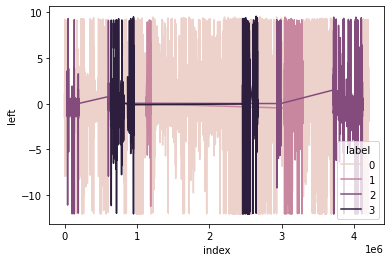

In [13]:
# Remove unnecessary columns

#print(df)
sns.lineplot(data=df, x = "index", y="left", hue = "label")
#sns.lineplot(data=df, y="acc_x")
#sns.lineplot(data=df, y="roll")

plt.show()


In [17]:
dfs = preprocess_dataset("condensed", persons=[1], days=[1] )["p1_d1"].reset_index()


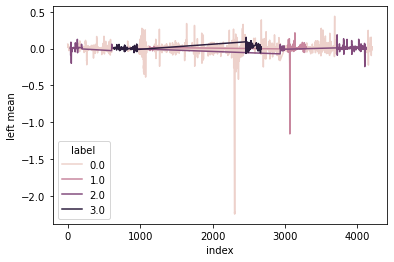

In [23]:
sns.lineplot(data=dfs, x = "index", y="left std", hue = "label")
#sns.lineplot(data=df, y="acc_x")
#sns.lineplot(data=df, y="roll")

plt.show()